In [1]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from skimage.filters import sobel
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from skimage.feature import canny
from skimage.io import imread, imshow
from skimage import io, color, util
from skimage.filters import prewitt_h,prewitt_v
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import cv2
import skfuzzy as fuzz

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score

In [2]:
# Define the categories
Categories = ['Diseased', 'Healthy']

flat_data_arr = []  # Input array
target_arr = []  # Output array
datadir = 'C:\\Users\\ujjwa\\Downloads\\Papaya Fruit Diseases Detection Using ML Technique\\DATA SET'

# Load images and perform image segmentation using Fuzzy C-Means clustering
for category in Categories:
    print(f'Loading category: {category}')
    path = os.path.join(datadir, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img_array = io.imread(img_path)
        
        # Convert the image to grayscale
        img_gray = color.rgb2gray(img_array)
        
        # Resize the image to a desired size (e.g., 64x64)
        img_resized = resize(img_gray, (64, 64))
        
        # Flatten the image
        img_flattened = img_resized.flatten()
        
        flat_data_arr.append(img_flattened)
        target_arr.append(Categories.index(category))
    
    print(f'Loaded category: {category} successfully')

# Convert the data to numpy arrays
flat_data = np.array(flat_data_arr)
target = np.array(target_arr)

# Apply Fuzzy C-Means clustering
n_clusters = len(Categories)  # Number of clusters
fuzziness = 2.0  # Fuzziness parameter (typically 2.0)
max_iter = 100  # Maximum number of iterations

# Scale the data
scaler = MinMaxScaler()
flat_data_scaled = scaler.fit_transform(flat_data)

# Perform Fuzzy C-Means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(flat_data_scaled.T, n_clusters, fuzziness,
                                                 maxiter=max_iter, error=0.005)


# The u matrix contains the membership values for each pixel and each cluster
# Convert u matrix to cluster labels
cluster_labels = np.argmax(u, axis=0)

# Create a DataFrame for the clustered data
df = pd.DataFrame(flat_data)
df['Target'] = target
df['Cluster'] = cluster_labels

# Split the data into training and testing sets
x = df.iloc[:, :-2]  # Input data
y = df['Cluster']  # Cluster labels as output
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=77, stratify=y)

print("x:", x.shape)
print("y:", y.shape)
print('Splitted Successfully')



Loading category: Diseased
Loaded category: Diseased successfully
Loading category: Healthy
Loaded category: Healthy successfully
x: (421, 4096)
y: (421,)
Splitted Successfully


The model is 91.76470588235294% accurate
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        41
           1       0.93      0.91      0.92        44

    accuracy                           0.92        85
   macro avg       0.92      0.92      0.92        85
weighted avg       0.92      0.92      0.92        85

Accuracy: 91.76 %
Precision: 91.79 %
Recall: 91.76 %
f1_score: 91.95 %
TrainingAccuracy: 100.0 %


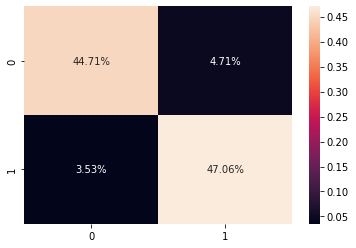

In [3]:
#DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier



dtc=DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=25, min_samples_split=2, min_samples_leaf=1,   
                           min_weight_fraction_leaf=0.0,max_features=None, random_state=None, 
                           max_leaf_nodes=None,  min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
dtc.fit(x_train,y_train)
y_pred_dtc=dtc.predict(x_test)
'''print("The predicted Data is :")
print(y_pred_dtc)
print("The actual data is:")
print(np.array(y_test))'''
print(f"The model is {accuracy_score(y_pred_dtc,y_test)*100}% accurate")


accuracy_score(y_pred_dtc,y_test)
print(classification_report(y_pred_dtc,y_test))
#Build confusion matrix
# Calculate the confusion matrix

cf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_dtc)

#print(cf_matrix)
#sns.heatmap(cf_matrix, annot=True)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
a_dtc = accuracy_score(y_pred_dtc,y_test) 
p_dtc = precision_score(y_pred_dtc,y_test, average = 'weighted')
r_dtc = recall_score(y_pred_dtc,y_test, average = 'weighted')
print("Accuracy:",round(a_dtc*100,2),"%")
print("Precision:",round(p_dtc*100,2),"%")
print("Recall:",round(r_dtc*100,2),"%")
f1_dtc = f1_score(y_test, y_pred_dtc)
print("f1_score:",round(f1_dtc*100,2),"%")
Training_accuracy_dtc=accuracy_score(y_train, dtc.predict(x_train))
print("TrainingAccuracy:",round(Training_accuracy_dtc*100,2),"%")




The the NB model is 97.6470588235294% accurate
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        44
           1       0.95      1.00      0.98        41

    accuracy                           0.98        85
   macro avg       0.98      0.98      0.98        85
weighted avg       0.98      0.98      0.98        85

Accuracy: 97.65 %
Precision: 97.75 %
Recall: 97.65 %
f1_score: 97.62 %
TrainingAccuracy: 94.94 %


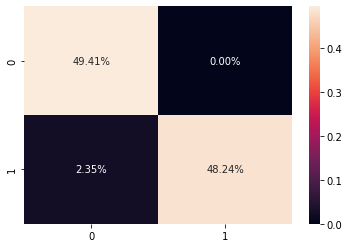

In [4]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb=nb.predict(x_test)
#print("predicted data is:")
#print(y_pred_nb)
#print("actual data is:")
#print(np.array(y_test))

print(f"The the NB model is {accuracy_score(y_pred_nb,y_test)*100}% accurate")
print(classification_report(y_pred_nb,y_test))
#Build confusion matrix
# Calculate the confusion matrix

cf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_nb)
#cf_matrix=confusion_matrix(y_test,y_pred, labels=['0','1'])
#cf_matrix = confusion_matrix(y, y_pred)
#print(cf_matrix)
#sns.heatmap(cf_matrix, annot=True)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
a_nb = accuracy_score(y_pred_nb,y_test) 
p_nb= precision_score(y_test, y_pred_nb, average = 'weighted')
r_nb = recall_score(y_test, y_pred_nb, average = 'weighted')
print("Accuracy:",round(a_nb*100,2),"%")
print("Precision:",round(p_nb*100,2),"%")
print("Recall:",round(r_nb*100,2),"%")
f1_nb = f1_score(y_test, y_pred_nb)
print("f1_score:",round(f1_nb*100,2),"%")
Training_accuracy_nb=accuracy_score(y_train, nb.predict(x_train))
print("TrainingAccuracy:",round(Training_accuracy_nb*100,2),"%")


              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.91      0.93      0.92        42

    accuracy                           0.92        85
   macro avg       0.92      0.92      0.92        85
weighted avg       0.92      0.92      0.92        85

Accuracy: 91.76 %
Precision: 91.79 %
Recall: 91.76 %
f1_score: 91.76 %
TrainingAccuracy: 100.0 %


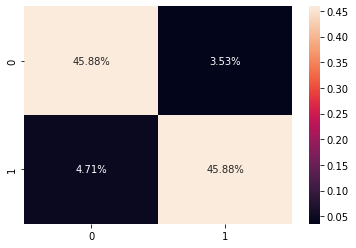

In [5]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', random_state=0)
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
accuracy_score(y_pred_lr,y_test)
print(classification_report(y_pred_lr,y_test))
cf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_lr)

#print(cf_matrix)
#sns.heatmap(cf_matrix, annot=True)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
a_lr = accuracy_score(y_pred_lr,y_test) 
p_lr = precision_score(y_pred_lr,y_test, average = 'weighted')
r_lr = recall_score(y_pred_lr,y_test, average = 'weighted')
print("Accuracy:",round(a_lr*100,2),"%")
print("Precision:",round(p_lr*100,2),"%")
print("Recall:",round(r_lr*100,2),"%")
f1_lr = f1_score(y_test, y_pred_lr)
print("f1_score:",round(f1_lr*100,2),"%")
Training_accuracy_lr=accuracy_score(y_train, lr.predict(x_train))
print("TrainingAccuracy:",round(Training_accuracy_lr*100,2),"%")


              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.93      0.95      0.94        42

    accuracy                           0.94        85
   macro avg       0.94      0.94      0.94        85
weighted avg       0.94      0.94      0.94        85

Accuracy: 94.12 %
Precision: 94.14 %
Recall: 94.12 %
f1_score: 94.12 %
TrainingAccuracy: 95.83 %


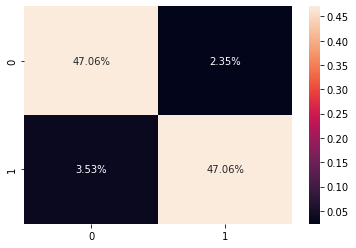

In [6]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score
knn=KNeighborsClassifier(n_neighbors=7)
#knn=KNeighborsClassifier(n_neighbors=1, weights='uniform', algorithm='auto', leaf_size=30, p=2,metric='minkowski', metric_params=None, n_jobs=None)
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
#y_pred_knn

accuracy_score(y_pred_knn,y_test)
print(classification_report(y_pred_knn,y_test))
#Build confusion matrix
# Calculate the confusion matrix

cf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_knn)

#print(cf_matrix)
#sns.heatmap(cf_matrix, annot=True)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
a_knn = accuracy_score(y_pred_knn,y_test) 
p_knn = precision_score(y_pred_knn,y_test, average = 'weighted')
r_knn = recall_score(y_pred_knn,y_test, average = 'weighted')
print("Accuracy:",round(a_knn*100,2),"%")
print("Precision:",round(p_knn*100,2),"%")
print("Recall:",round(r_knn*100,2),"%")
f1_knn = f1_score(y_test, y_pred_knn)
print("f1_score:",round(f1_knn*100,2),"%")
Training_accuracy_knn=accuracy_score(y_train, knn.predict(x_train))
print("TrainingAccuracy:",round(Training_accuracy_knn*100,2),"%")


RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        44
           1       0.95      1.00      0.98        41

    accuracy                           0.98        85
   macro avg       0.98      0.98      0.98        85
weighted avg       0.98      0.98      0.98        85

Accuracy: 97.65 %
Precision: 97.76 %
Recall: 97.65 %
f1_score: 97.62 %
TrainingAccuracy: 100.0 %


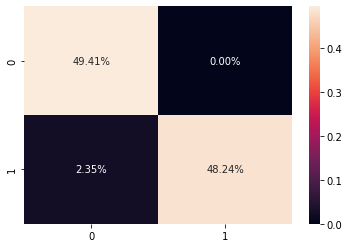

In [7]:
#RandomForestClassifier
print("RandomForestClassifier")

from sklearn.ensemble import RandomForestClassifier
#model_rf=RandomForestClassifier()
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, 
min_samples_split=12, min_samples_leaf=5, min_weight_fraction_leaf=0.0, max_features='log2',
max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None,   random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

model_rf.fit(x_train,y_train)
y_pred_rf=model_rf.predict(x_test)
y_pred_rf
acc_rf=accuracy_score(y_pred_rf,y_test)
print(classification_report(y_pred_rf,y_test))

cf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_rf)

#print(cf_matrix)
#sns.heatmap(cf_matrix, annot=True)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
a_rf = accuracy_score(y_pred_rf,y_test) 
p_rf = precision_score(y_pred_rf,y_test, average = 'weighted')
r_rf = recall_score(y_pred_rf,y_test, average = 'weighted')
print("Accuracy:",round(a_rf*100,2),"%")
print("Precision:",round(p_rf*100,2),"%")
print("Recall:",round(r_rf*100,2),"%")
f1_rf = f1_score(y_test, y_pred_rf)
print("f1_score:",round(f1_rf*100,2),"%")
Training_accuracy_rf=accuracy_score(y_train, model_rf.predict(x_train))
print("TrainingAccuracy:",round(Training_accuracy_rf*100,2),"%")




In [8]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

voting_3_classifiers = VotingClassifier(estimators=[('GaussianNB', nb),('Decison Tree',dtc),
                                                    ('KNN',knn),('logistic_regression',lr)], 
                                        voting='soft')
voting_3_classifiers.fit(x_train,y_train)
voting_predictions_soft = voting_3_classifiers.predict(x_test)
print('Accuracy of voting_3_classifiers = ', accuracy_score(y_test, voting_predictions_soft)*100)
a_voting_soft = accuracy_score(y_test, voting_predictions_soft)
p_voting_soft = precision_score(y_test, voting_predictions_soft, average = 'weighted')
r_voting_soft = recall_score(y_test, voting_predictions_soft, average = 'weighted')
print("Accuracy:",round(a_voting_soft*100,2),"%")
print("Precision:",round(p_voting_soft*100,2),"%")
print("Recall:",round(r_voting_soft*100,2),"%")
f1_voting_soft = f1_score(y_test, voting_predictions_soft,average='weighted')
print("f1_score:",round(f1_voting_soft*100,2),"%")
Training_accuracy_soft=accuracy_score(y_train, voting_3_classifiers.predict(x_train))
print("TrainingAccuracy:",round(Training_accuracy_soft*100,2),"%")



Accuracy of voting_3_classifiers =  96.47058823529412
Accuracy: 96.47 %
Precision: 96.5 %
Recall: 96.47 %
f1_score: 96.47 %
TrainingAccuracy: 100.0 %


Accuracy of voting_3_classifiers =  96.47058823529412
Accuracy: 96.47 %
Precision: 96.71 %
Recall: 96.47 %
f1_score: 96.39 %
TrainingAccuracy: 96.47 %
[[42  0]
 [ 3 40]]


<Axes: >

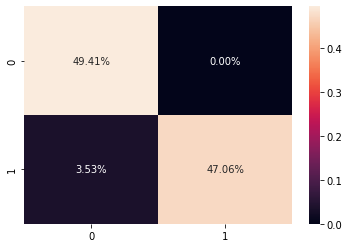

In [9]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

voting_3_classifiers = VotingClassifier(estimators=[ ('GaussianNB', nb),('Decison Tree',dtc),
                                                    ('KNN',knn),('logistic_regression',lr)], 
                                        voting='hard')
voting_3_classifiers.fit(x_train,y_train)
voting_predictions_hard = voting_3_classifiers.predict(x_test)
print('Accuracy of voting_3_classifiers = ', accuracy_score(y_test, voting_predictions_hard)*100)
a_voting_hard = accuracy_score(y_test, voting_predictions_hard)
p_voting_hard = precision_score(y_test, voting_predictions_hard, average = 'weighted')
r_voting_hard = recall_score(y_test, voting_predictions_hard, average = 'weighted')
print("Accuracy:",round(a_voting_hard*100,2),"%")
print("Precision:",round(p_voting_hard*100,2),"%")
print("Recall:",round(r_voting_hard*100,2),"%")
f1_voting_hard = f1_score(y_test, voting_predictions_hard)
print("f1_score:",round(f1_voting_hard*100,2),"%")
Training_accuracy_voting_3_classifiers=accuracy_score(y_test, voting_3_classifiers.predict(x_test))
print("TrainingAccuracy:",round(Training_accuracy_voting_3_classifiers*100,2),"%")
#Build confusion matrix
# Calculate the confusion matrix

cf_matrix = confusion_matrix(y_true=y_test, y_pred=voting_predictions_hard)
#cf_matrix=confusion_matrix(y_test,y_pred, labels=['0','1'])
#cf_matrix = confusion_matrix(y, y_pred)
print(cf_matrix)
#sns.heatmap(cf_matrix, annot=True)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')


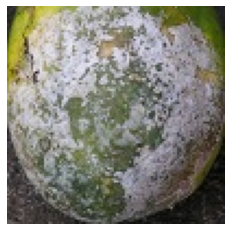

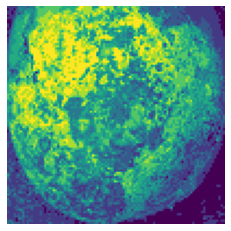

0 Diseased
Diseased = 86.6704772906905%
1 Healthy
Healthy = 13.329522709309503%
The predicted image is : Diseased


In [14]:
#############################prediction############################
#url=input('Enter URL of Image :')
#img=imread("D:/SIoT/dataset/Augmented_DataSet/AugmentedSet_320px/trail_dataset_ac_healthy/Healthy_Copy/IMG_20220526_120225.jpg")
#img=imread("D:/SIoT/dataset/Augmented_DataSet/AugmentedSet_320px/trail_dataset_ac_healthy/Healthy_Copy/IMG_20220526_120225.jpg")

img=imread(r"C:\\Users\\ujjwa\\Downloads\\Papaya Fruit Diseases Detection Using ML Technique\\DATA SET\\Diseased\\r2_a87.jpg")
plt.imshow(img)
plt.axis('off')
plt.show()

#img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
#img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

vectorized = img_gray.reshape((1,-1))
vectorized = np.float32(vectorized)
#let’s define k, attempts, and criteria as required by K-Means as a parameter
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 9
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

center=np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img_gray.shape))
img_resize=resize(result_image,(64,64))  

plt.imshow(result_image)
plt.axis('off')
plt.show()       

flat_data_arr.append(img_resize.flatten())
#edge_image = sobel(img_resize) # apply the filter
l=[img_resize.flatten()]
#print(len(l))

probability_lr=lr.predict_proba(l)
for ind,val in enumerate(Categories):
    print(ind,val)
    print(f'{val} = {probability_lr[0][ind]*100}%')
print("The predicted image is : "+Categories[lr.predict(l)[0]])

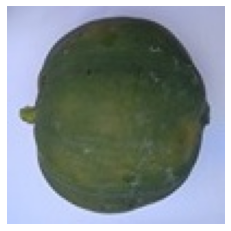

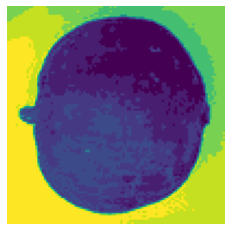

0 Diseased
Diseased = 0.0%
1 Healthy
Healthy = 100.0%
The predicted image is : Healthy


In [15]:
#############################prediction############################
#url=input('Enter URL of Image :')
#img=imread("D:/SIoT/dataset/Augmented_DataSet/AugmentedSet_320px/trail_dataset_ac_healthy/Healthy_Copy/IMG_20220526_120225.jpg")
#img=imread("D:/SIoT/dataset/Augmented_DataSet/AugmentedSet_320px/trail_dataset_ac_healthy/Healthy_Copy/IMG_20220526_120225.jpg")

img=imread(r"C:\\Users\\ujjwa\\Downloads\\Papaya Fruit Diseases Detection Using ML Technique\\DATA SET\\Healthy\\r2_1 (80).jpg")
plt.imshow(img)
plt.axis('off')
plt.show()

#img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
#img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

vectorized = img_gray.reshape((1,-1))
vectorized = np.float32(vectorized)
#let’s define k, attempts, and criteria as required by K-Means as a parameter
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 9
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

center=np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img_gray.shape))
img_resize=resize(result_image,(64,64))

plt.imshow(result_image)
plt.axis('off')
plt.show()       

flat_data_arr.append(img_resize.flatten())
#edge_image = sobel(img_resize) # apply the filter
l=[img_resize.flatten()]
#print(len(l))

probability_dtc=dtc.predict_proba(l)
for ind,val in enumerate(Categories):
    print(ind,val)
    print(f'{val} = {probability_dtc[0][ind]*100}%')
print("The predicted image is : "+Categories[dtc.predict(l)[0]])

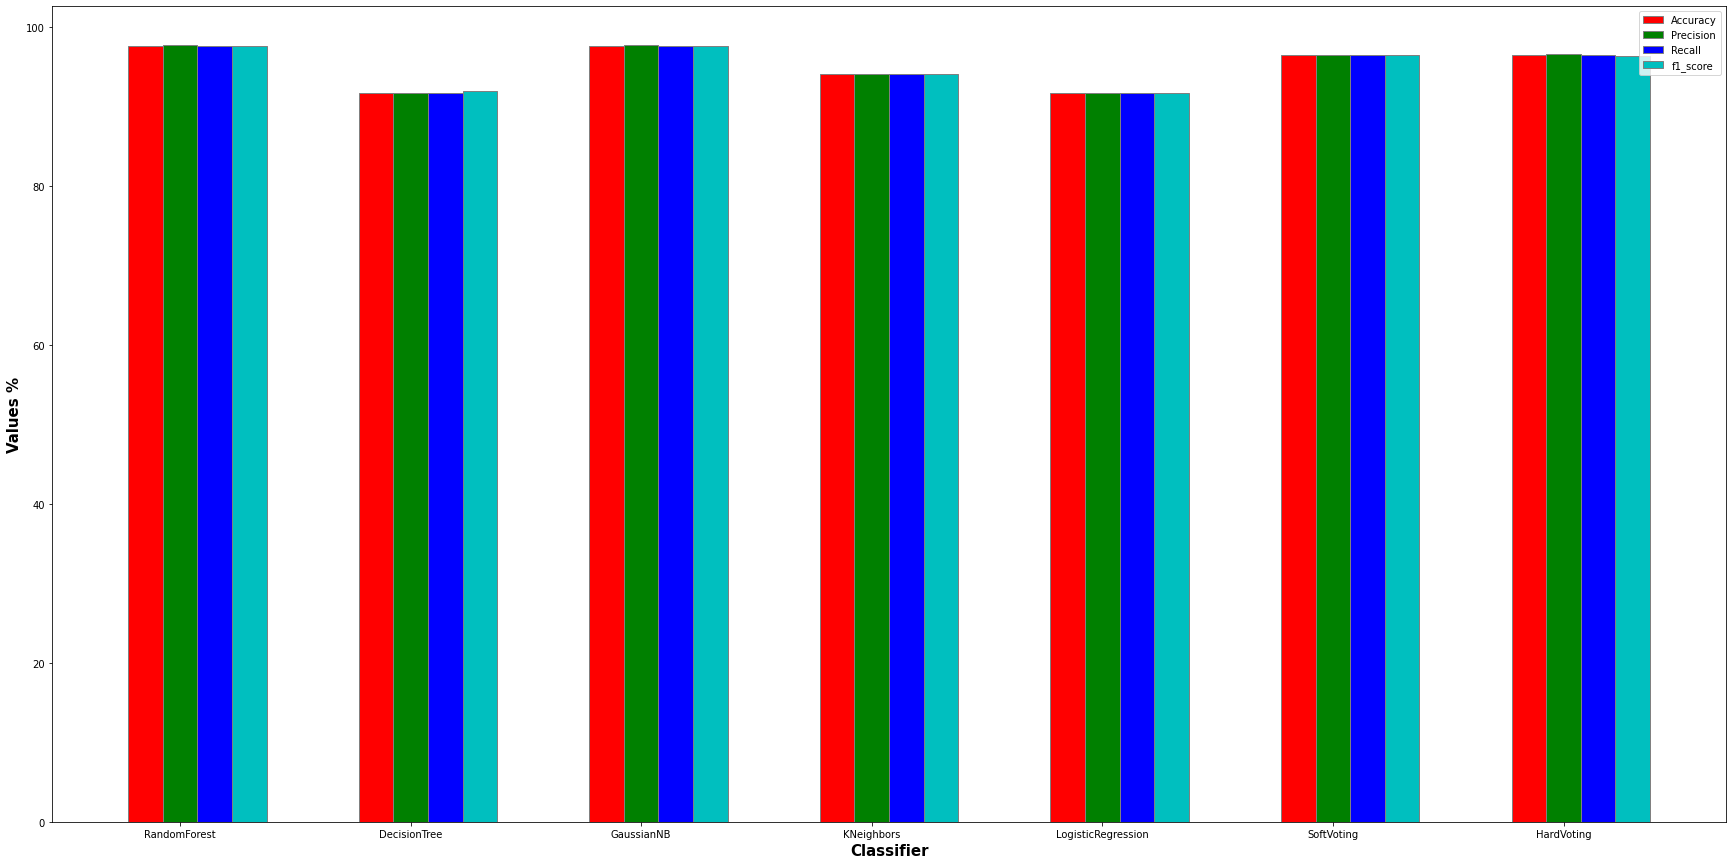

In [10]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(30, 15))
 
# set height of bar
Accuracy = [a_rf*100, a_dtc*100, a_nb*100, a_knn*100, a_lr*100, a_voting_soft*100, a_voting_hard*100]
Precision = [p_rf*100, p_dtc*100, p_nb*100, p_knn*100, p_lr*100, p_voting_soft*100, p_voting_hard*100]
Recall = [r_rf*100, r_dtc*100, r_nb*100, r_knn*100, r_lr*100, r_voting_soft*100, r_voting_hard*100]
f1_score = [f1_rf*100, f1_dtc*100, f1_nb*100, f1_knn*100, f1_lr*100, f1_voting_soft*100, f1_voting_hard*100]
 
# Set position of bar on X axis
br1 = np.arange(len(Accuracy))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
 
# Make the plot
plt.bar(br1, Accuracy, color ='r', width = barWidth,
        edgecolor ='grey', label ='Accuracy')
plt.bar(br2, Precision, color ='g', width = barWidth,
        edgecolor ='grey', label ='Precision')
plt.bar(br3, Recall, color ='b', width = barWidth,
        edgecolor ='grey', label ='Recall')
plt.bar(br4, f1_score, color ='c', width = barWidth,
        edgecolor ='grey', label ='f1_score')
 
# Adding Xticks
plt.xlabel('Classifier', fontweight ='bold', fontsize = 15)
plt.ylabel('Values %', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Accuracy))],
        ['RandomForest', 'DecisionTree', 'GaussianNB', 'KNeighbors', 'LogisticRegression', 'SoftVoting', 'HardVoting'])
 
plt.legend()
plt.show()